# XML example and exercise
****
+ study examples of accessing nodes in XML tree structure  
+ work on exercise to be completed and submitted
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

In [1]:
from xml.etree import ElementTree as ET

## XML example

+ for details about tree traversal and iterators, see https://docs.python.org/2.7/library/xml.etree.elementtree.html

In [2]:
document_tree = ET.parse( './data/mondial_database_less.xml' )

In [3]:
# print names of all countries
for child in document_tree.getroot():
#    print child.find('name').text
    print(child.find('name').text)

Albania
Greece
Macedonia
Serbia
Montenegro
Kosovo
Andorra


In [4]:
# print names of all countries and their cities
for element in document_tree.iterfind('country'):
    print( '* ' + element.find('name').text + ':',)
    capitals_string = ''
    for subelement in element.getiterator('city'):
        capitals_string += subelement.find('name').text + ', '
    print( capitals_string[:-2])

* Albania:
Tirana, Shkodër, Durrës, Vlorë, Elbasan, Korçë
* Greece:
Komotini, Kavala, Athina, Peiraias, Peristeri, Acharnes, Patra, Kozani, Kerkyra, Ioannina, Thessaloniki, Iraklio, Chania, Ermoupoli, Rhodes, Tripoli, Lamia, Chalkida, Larissa, Volos, Mytilini, Karyes
* Macedonia:
Skopje, Kumanovo
* Serbia:
Beograd, Novi Sad, Niš
* Montenegro:
Podgorica
* Kosovo:
Prishtine
* Andorra:
Andorra la Vella


****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [5]:
document = ET.parse( './data/mondial_database.xml' )

First, import all necessary libraries.

In [6]:
import sys
from lxml import etree
import pandas as pd
import numpy as np

%matplotlib inline

Next, read in the data using the lxml parser function.

In [7]:
document = etree.parse('./data/mondial_database.xml' )

Preview the document.

In [8]:
document

In [9]:
type(document)

lxml.etree._ElementTree

In [10]:
len(etree.tostring(document, 
                     encoding='utf-8', 
                     pretty_print=True).decode())

3169173

Print the first five thousand characters of the document to see what it looks like.

In [11]:
print(etree.tostring(document, 
                     encoding='utf-8', 
                     pretty_print=True).decode()[0:5000])

<!DOCTYPE mondial SYSTEM "mondial.dtd">
<mondial>
   <country car_code="AL" area="28750" capital="cty-Albania-Tirane" memberships="org-BSEC org-CEI org-CD org-SELEC org-CE org-EAPC org-EBRD org-EITI org-FAO org-IPU org-IAEA org-IBRD org-ICC org-ICAO org-ICCt org-Interpol org-IDA org-IFRCS org-IFC org-IFAD org-ILO org-IMO org-IMF org-IOC org-IOM org-ISO org-OIF org-ITU org-ITUC org-IDB org-MIGA org-NATO org-OSCE org-OPCW org-OAS org-OIC org-PCA org-UN org-UNCTAD org-UNESCO org-UNIDO org-UPU org-WCO org-WFTU org-WHO org-WIPO org-WMO org-UNWTO org-WTO">
      <name>Albania</name>
      <population measured="est." year="1950">1214489</population>
      <population measured="est." year="1960">1618829</population>
      <population measured="est." year="1970">2138966</population>
      <population measured="est." year="1980">2734776</population>
      <population measured="est." year="1990">3446882</population>
      <population year="1997">3249136</population>
      <population measured="es

### Problem 1. Find the 10 countries with the lowest infant mortality rates

#### What is the infant mortality rate?

**Infant mortality** refers to deaths of young children, typically those less than one year of age. It is measured by the **infant mortality rate** (**IMR**), which is **the number of deaths of children under one year of age per 1000 live births**.

[See https://en.wikipedia.org/wiki/Infant_mortality]

How many countries are we dealing with?

In [12]:
country_list = []

for element in document.iterfind('country'):
    country_list.append(element.find('name').text)

country_list = sorted(country_list)
len(country_list)

244

Are all of the values in this list of countries unique?

In [13]:
len(country_list) == len(set(country_list))

True

Let's look at the raw data and see if there is a .tag attribute that might indicate an element with infant mortality data.

In [14]:
print(etree.tostring(document, 
                     encoding='utf-8', 
                     pretty_print=True).decode()[0:2000])

<!DOCTYPE mondial SYSTEM "mondial.dtd">
<mondial>
   <country car_code="AL" area="28750" capital="cty-Albania-Tirane" memberships="org-BSEC org-CEI org-CD org-SELEC org-CE org-EAPC org-EBRD org-EITI org-FAO org-IPU org-IAEA org-IBRD org-ICC org-ICAO org-ICCt org-Interpol org-IDA org-IFRCS org-IFC org-IFAD org-ILO org-IMO org-IMF org-IOC org-IOM org-ISO org-OIF org-ITU org-ITUC org-IDB org-MIGA org-NATO org-OSCE org-OPCW org-OAS org-OIC org-PCA org-UN org-UNCTAD org-UNESCO org-UNIDO org-UPU org-WCO org-WFTU org-WHO org-WIPO org-WMO org-UNWTO org-WTO">
      <name>Albania</name>
      <population measured="est." year="1950">1214489</population>
      <population measured="est." year="1960">1618829</population>
      <population measured="est." year="1970">2138966</population>
      <population measured="est." year="1980">2734776</population>
      <population measured="est." year="1990">3446882</population>
      <population year="1997">3249136</population>
      <population measured="es

There is an 'infant_mortality' .tag.  We'll use this to extract infant mortality data.

Do do this, we'll create a dictionary that captures the infant mortality data for each country.

In [15]:
infant_mortality_dict = {}

for element in document.iterfind('country'):
    try:
        infant_mortality_dict.update({element.find('name').text : float(element.find('infant_mortality').text)})
    except:
        infant_mortality_dict.update({element.find('name').text : np.nan})

Next, we will create a DataFrame from the data in our infant_mortality_dict.

In [16]:
infant_mortality_df = pd.DataFrame()
infant_mortality_df = infant_mortality_df.from_dict(infant_mortality_dict, orient='index')
infant_mortality_df.head()

,0
Albania,13.19
Greece,4.78
Macedonia,7.90
Serbia,6.16
Montenegro,NaN


We want to label the country index and the infant mortality column

In [17]:
infant_mortality_df.index.name = 'country'
infant_mortality_df.rename(columns={0: 'infant_mortality'}, inplace=True)
infant_mortality_df.head()

,infant_mortality
country,
Albania,13.19
Greece,4.78
Macedonia,7.90
Serbia,6.16
Montenegro,NaN


We want to check for blind spots.  For what countries are we missing infant mortality data?

In [18]:
infant_mortality_df[infant_mortality_df.infant_mortality.isnull()]

,infant_mortality
country,
Montenegro,NaN
Kosovo,NaN
Holy See,NaN
Ceuta,NaN
Melilla,NaN
Svalbard,NaN
Christmas Island,NaN
Cocos Islands,NaN
Curacao,NaN


We should bear in mind that one of these countries might have a low enough infant mortality rate to rank amoung the 10 countries with the lowest infant mortality rates.  We can't know for sure unless we have more complete data.

Now, let's sort our DataFrame so that the countries with the lowest infant mortality rates are at the top.

In [19]:
infant_mortality_df.sort_values('infant_mortality', ascending=True, inplace=True)
infant_mortality_df.head(10)

,infant_mortality
country,
Monaco,1.81
Japan,2.13
Bermuda,2.48
Norway,2.48
Singapore,2.53
Sweden,2.60
Czech Republic,2.63
Hong Kong,2.73
Macao,3.13


These are the 10 countries with the lowest infant mortality rates.

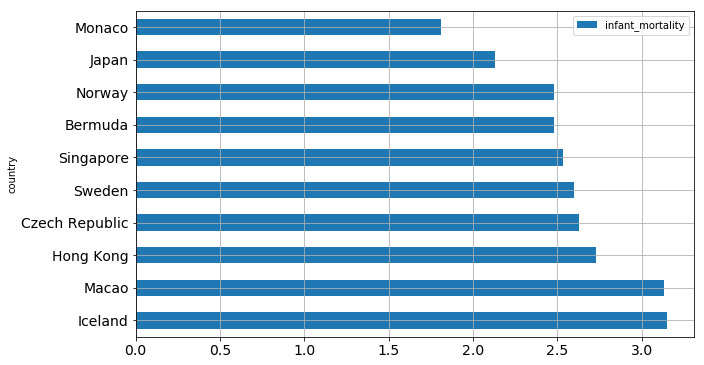

In [20]:
infant_mortality_df.head(10).sort_values('infant_mortality', 
                                         ascending=False).plot(kind='barh',
                                                               grid=True, 
                                                               figsize=(10,6), 
                                                               fontsize=14)

### Problem 2. Find the 10 cities with the largest population

From inspecting the raw xml file, we can see that many cities have multiple population measurements from various years. Consider the example of Shkodër, Albania:

    </city>
          <city id="stadt-Shkoder-AL-AL" country="AL">
             <name>Shkodër</name>
             <latitude>42.2</latitude>
             <longitude>19.2</longitude>
             <population year="1987">62000</population>
             <population year="2011" measured="census">77075</population>
             <located_at watertype="lake" lake="lake-Skutarisee"/>
 
Shkodër has a population measurement from both 1987 and 2011.

For each city, we only care about the most recent population measurement.

Therefore, we want to :

1. Iterate over all cities in the data and;
2. For each city, capture every population measurement and the year the measurement was made;
3. Identify the most recent population measurement for each city and save it to a dictionary;
4. We also want to capture each city's name, local name, and country.

In [21]:
city_dict = {}

for element in document.iterfind('country'):
    for subelement in element.getiterator('city'):
        try:
            
# Create a temporary dictionary that captures each population measurement for the city.
# This is a dictionary of 'year: population' pairs.

            year_dict = {}
            for i in subelement.getiterator('population'):
                try:
                    year_dict.update({int(i.attrib['year']): int(i.text)})
                    #document.find('country').find('city').findall('population')
                except:
                    None
                
# Identify the most recent population measurement for the city based on the year_dict created above.

            try:
                max_year = max(year_dict.keys())
            except:
                max_year = np.nan

            try:
                max_year_pop = year_dict.get(max_year)
            except:
                max_year_pop = np.nan

# Capture the name of the city.
                
            try:
                name = subelement.find('name').text
            except:
                name = ''

# Capture the local name of the city.                
                
            try:
                localname = subelement.find('localname').text
            except:
                localname = ''

# Capture the city's country.               
                
            try:
                #country = subelement.getparent().find('name').text
                for i in subelement.iterancestors('country'): 
                    country = i.find('name').text
                    
            except:
                country = ''

        except:
            pass

# Store all of the captured data to a dictionary.
# The city's 'id' will be used as the dictionary key.

        city_dict.update({subelement.attrib['id'] : {'name' : name, 
                                                           'localname' : localname, 
                                                           'country' : country,
                                                           'year_measured' : max_year, 
                                                           'population' : max_year_pop}})

Next, we create a DataFrame from the dictionary

In [22]:
city_pop_df = pd.DataFrame()
city_pop_df = city_pop_df.from_dict(city_dict, orient='index')
city_pop_df.sort_values('population', ascending=False, inplace=True)
city_pop_df.head(10)

,name,localname,country,year_measured,population
cty-China-Shanghai,Shanghai,上海巿,China,2010.0,22315474.0
cty-Turkey-Istanbul,Istanbul,,Turkey,2012.0,13710512.0
cty-India-2,Mumbai,,India,2011.0,12442373.0
cty-Russia-Moscow,Moskva,Москва,Russia,2013.0,11979529.0
cty-China-3,Beijing,北京巿,China,2010.0,11716620.0
cty-Brazil-Sao-Paulo,São Paulo,,Brazil,2010.0,11152344.0
cty-China-5,Tianjin,天津巿,China,2010.0,11090314.0
cty-China-8,Guangzhou,广州市,China,2010.0,11071424.0
cty-India-New-Delhi,Delhi,,India,2011.0,11034555.0
cty-China-105,Shenzhen,深圳市,China,2010.0,10358381.0


We want to check for blind spots.  Which cities are missing population data?

In [23]:
city_pop_df[city_pop_df.population.isnull()]

,name,localname,country,year_measured,population
city-Adamstown-PITC-PITC,Adamstown,,Pitcairn,NaN,NaN
city-Agana-GUAM,Agana,,Guam,NaN,NaN
city-Alofi-NIUE-NIUE,Alofi,,Niue,NaN,NaN
city-Avarua-COOK-COOK,Avarua,,Cook Islands,NaN,NaN
city-George-Town-CAYM-CAYM,George Town,,Cayman Islands,NaN,NaN
city-Grand-Turk-TUCA-TUCA,Grand Turk,,Turks and Caicos Islands,NaN,NaN
city-Hamilton-BERM-BERM,Hamilton,,Bermuda,NaN,NaN
city-Jamestown-HELX-HELX,Jamestown,,Saint Helena,NaN,NaN
city-Longyearbyen-SVAX-SVAX,Longyearbyen,,Svalbard,NaN,NaN
city-Mamoutzou-MAYO-MAYO,Mamoutzou,,Mayotte,NaN,NaN


The following are the ten most populous cities:

In [24]:
city_pop_df.head(10)

,name,localname,country,year_measured,population
cty-China-Shanghai,Shanghai,上海巿,China,2010.0,22315474.0
cty-Turkey-Istanbul,Istanbul,,Turkey,2012.0,13710512.0
cty-India-2,Mumbai,,India,2011.0,12442373.0
cty-Russia-Moscow,Moskva,Москва,Russia,2013.0,11979529.0
cty-China-3,Beijing,北京巿,China,2010.0,11716620.0
cty-Brazil-Sao-Paulo,São Paulo,,Brazil,2010.0,11152344.0
cty-China-5,Tianjin,天津巿,China,2010.0,11090314.0
cty-China-8,Guangzhou,广州市,China,2010.0,11071424.0
cty-India-New-Delhi,Delhi,,India,2011.0,11034555.0
cty-China-105,Shenzhen,深圳市,China,2010.0,10358381.0


### Problem 3. Find the 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)

From inspecting the raw xml file, we can see that many countries have multiple ethnic groups. Consider the example of Macedonia:

    <country car_code="MK" area="25333" capital="cty-Macedonia-Skopje" memberships="org-BIS org-CEI org-CD org-SELEC org-CE org-EAPC org-EBRD org-EU org-FAO org-IPU org-IAEA org-IBRD org-ICC org-ICAO org-ICCt org-Interpol org-IDA org-IFRCS org-IFC org-IFAD org-ILO org-IMO org-IMF org-IOC org-IOM org-OIF org-ITU org-ITUC org-MIGA org-OSCE org-OPCW org-OAS org-PFP org-PCA org-UN org-UNCTAD org-UNESCO org-UNHCR org-UNIDO org-UNIFIL org-UPU org-WCO org-WHO org-WIPO org-WMO org-UNWTO org-WTO">
          <name>Macedonia</name>
          <localname>Република Македониjа</localname>
          <population measured="census" year="1921">808724</population>
          <population measured="census" year="1931">949958</population>
          <population measured="census" year="1948">1152986</population>
          <population measured="census" year="1953">1304514</population>
          
          ...
          
          <encompassed continent="europe" percentage="100"/>
          <ethnicgroup percentage="64.2">Macedonian</ethnicgroup>
          <ethnicgroup percentage="25.2">Albanian</ethnicgroup>
          <ethnicgroup percentage="3.9">Turkish</ethnicgroup>
          <ethnicgroup percentage="2.7">Gypsy</ethnicgroup>
          <ethnicgroup percentage="1.8">Serb</ethnicgroup>
          <religion percentage="64.7">Christian Orthodox</religion>
          <religion percentage="33.3">Muslim</religion>
          
          ...
          
       </country> 

Macedonia's population is:
+ 64.2 percent Macedonian;
+ 25.2 percent Albanian;
+ 3.9 percent Turkish;
+ 2.7 percent Gypsy; and
+ 1.8 percent Serb.

For each country, we want to capture the name of each ethnic group and the population (in percentage terms) of each ethnic group.

In [25]:
ethnic_dict = {}

for element in document.iterfind('country'):
    
    temp_dict = {}
    
    try:
        for subelement in element.iterchildren('ethnicgroup'):
            try:
                temp_dict.update({subelement.text: (float(subelement.attrib['percentage']) / 100)})
            except:
                pass
    except:
        pass

    ethnic_dict.update({element.find('name').text : temp_dict})

Next, we create a DataFrame from the dictionary.

In [26]:
ethnic_df = pd.DataFrame()
ethnic_df = ethnic_df.from_dict(ethnic_dict, orient='index')
ethnic_df

,Albanian,Greek,Macedonian,Turkish,Gypsy,Serb,Montenegrin,Hungarian,Roma,Bosniak,...,Lugbara,Bunyoro,Batobo,Sotho,Euro-African,Indo-Mauritian,Sino-Mauritian,Franco-Mauritian,African descent,Seychellois
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.95,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In theory, the population of all ethnic groups, in percentage terms, for a given country should sum to 100 percent.  Is this the case?

In [27]:
ethnic_df.sum(axis=1)
ethnic_df.sum(axis=1).sort_values()

Mozambique                   0.0034
Guadeloupe                   0.0500
South Africa                 0.1120
French Guiana                0.1200
Burkina Faso                 0.2400
Trinidad and Tobago          0.4100
Zaire                        0.4500
Guam                         0.6340
Cote dIvoire                 0.6700
Canada                       0.6800
Mauritania                   0.7000
Indonesia                    0.7400
Angola                       0.7600
Sudan                        0.7600
New Zealand                  0.7680
Uganda                       0.7700
Aruba                        0.8000
Cayman Islands               0.8000
Guyana                       0.8280
Norway                       0.8400
Barbados                     0.8400
Brunei                       0.8400
Somalia                      0.8500
Bhutan                       0.8500
Kenya                        0.8500
Ethiopia                     0.8590
Qatar                        0.8600
Luxembourg                  

We can see that the ethnic group data is incomplete, but it is the best that we have.

Next, we will need to get the population for each country.  We only want the most recent population measurement for each country.

In [28]:
country_population_dict = {}

for element in document.iterfind('country'):
    
    year_dict = {}
    
    for subelement in element.iterchildren('population'):
        
        try:
            year_dict.update({int(subelement.attrib['year']): int(subelement.text)})
        except:
            pass
            
    try:
        max_year = max(year_dict.keys())
    except:
        max_year = np.nan

    try:
        max_year_pop = year_dict.get(max_year)
    except:
        max_year_pop = np.nan

    country_population_dict.update({element.find('name').text : {'population' : max_year_pop}})

Next, we create a DataFrame from the dictionary.

In [29]:
country_population_df = pd.DataFrame()
country_population_df = country_population_df.from_dict(country_population_dict, orient='index')
country_population_df.sort_index().head()

,population
Afghanistan,26023100
Albania,2800138
Algeria,37062820
American Samoa,55519
Andorra,78115


To calculate the population of each ethnic group in each country, we multiply each ethnic group's percentage of the population by the country's total population

In [30]:
ethnic_pop_df = ethnic_df.mul(country_population_df['population'], axis=0, fill_value=None)

#round to whole numbers:
ethnic_pop_df = ethnic_pop_df.apply(round)

#name the index
ethnic_pop_df.index.name = 'country'

ethnic_pop_df.head()

,Albanian,Greek,Macedonian,Turkish,Gypsy,Serb,Montenegrin,Hungarian,Roma,Bosniak,...,Lugbara,Bunyoro,Batobo,Sotho,Euro-African,Indo-Mauritian,Sino-Mauritian,Franco-Mauritian,African descent,Seychellois
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2660131.0,84004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
ethnicity_population = pd.DataFrame(data=ethnic_pop_df.sum(axis=0).sort_values(ascending=False), columns=['population'])

ethnicity_population.head(10).style.format("{:,.0f}")

,population
Han Chinese,"1,245,058,800"
Indo-Aryan,"871,815,583"
European,"494,872,221"
African,"318,325,121"
Dravidian,"302,713,744"
Mestizo,"157,734,355"
Bengali,"146,776,917"
Russian,"131,856,994"
Japanese,"126,534,212"
Malay,"121,993,550"


Based on our data, the 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries) are as follows:

1. Han Chinese, with a population of 1,245,058,800;
2. Indo-Aryan, with a population of 871,815,583;
3. European, with a population of 494,872,221;
4. African, with a population of 318,325,121;
5. Dravidian, with a population of 302,713,744;
6. Mestizo, with a population of 157,734,355;
7. Bengali, with a population of 146,776,917;
8. Russian, with a population of 131,856,994;
9. Japanese, with a population of 126,534,212; and
10. Malay, with a population of 121,993,550.

### Problem 4. Find the name and country of a) longest river, b) largest lake and c) airport at highest elevation.

#### Problem 4.a) Find the name and country of the longest river.

From inspecting the raw xml file, we can see that the data contain 'river' tags. Consider the example of the Thames River:

    <river id="river-Themse" country="GB">
          <name>Thames</name>
          <located country="GB" province="prov-gb-6 prov-gb-7 prov-gb-8 prov-gb-9"/>
          <to watertype="sea" water="sea-Nordsee"/>
          <area>12935</area>
          <length>346</length>
          <source country="GB">
             <located country="GB" province="prov-gb-9"/>
             <latitude>51.70</latitude>
             <longitude>-2.03</longitude>
             <elevation>105</elevation>
          </source>
          <estuary country="GB">
             <located country="GB" province="prov-gb-6 prov-gb-8"/>
             <latitude>51.50</latitude>
             <longitude>0.65</longitude>
          </estuary>
       </river>

From this, we see that for each river, we should be able to extract the river's:
+ id;
+ name;
+ country; and
+ length

We will create a dictionary to capture this information for each river.

In [32]:
river_dict = {}

for element in document.iterfind('river'):
    
    try:
        id_str = element.attrib['id']
    except:
        id_str = ''
    
    try:
        name = element.find('name').text
    except:
        name = ''
    
    try:
        country = element.attrib['country']
    except:
        country = ''
    
    try:
        length = int(element.find('length').text)
    except:
        length = np.nan
    
    river_dict.update({id_str : {'name' : name, 'country' : country, 'length' : length}})

Next, we create a DataFrame from the dictionary.

In [33]:
river_df = pd.DataFrame()
river_df = river_df.from_dict(river_dict, orient='index')

river_df = river_df.sort_values('length', ascending=False)
river_df.head(1)

,name,country,length
river-Amazonas,Amazonas,CO BR PE,6448.0


Based on the data, the Amazon River is the longest river.  According to the data, this river goes through Colombia, Brazil, and Peru.

#### Problem 4.b) Find the name and country of the largest lake

From inspecting the raw xml file, we can see that the data contain 'lake' tags. Consider the example of Lake Inari:

      <lake id="lake-Inarisee" country="SF">
          <name>Inari</name>
          <located country="SF" province="lteil-LAP-SF"/>
          <to watertype="river" water="river-Paatsjoki"/>
          <area>1040</area>
          <latitude>68.95</latitude>
          <longitude>27.7</longitude>
          <elevation>119</elevation>
          <depth>92</depth>
       </lake>

From this, we see that for each lake, we should be able to extract the lake's:
+ id;
+ name;
+ country; and
+ area

We will create a dictionary to capture this information for each lake.



In [34]:
lake_dict = {}

for element in document.iterfind('lake'):
    
    try:
        id_str = element.attrib['id']
    except:
        id_str = ''
    
    try:
        name = element.find('name').text
    except:
        name = ''
    
    try:
        country = element.attrib['country']
    except:
        country = ''
    
    try:
        area = int(element.find('area').text)
    except:
        length = np.nan
    
    lake_dict.update({id_str : {'name' : name, 'country' : country, 'area' : area}})

Next, we create a DataFrame from the dictionary.

In [35]:
lake_df = pd.DataFrame()
lake_df = lake_df.from_dict(lake_dict, orient='index')

lake_df = lake_df.sort_values('area', ascending=False)
lake_df.head(1)

,name,country,area
lake-KaspischesMeer,Caspian Sea,R AZ KAZ IR TM,386400


The world's largest lake is the Caspian Sea.  It is bordered by Russia, Azerbaijan, Kazakhstan, Iran, and Turkmenistan.

#### Problem 4.c) Find the name and country of the airport at highest elevation

From inspecting the raw xml file, we can see that the data contain 'airport' tags. Consider the example of Kabul International Airport:

       <airport iatacode="KBL" city="cty-Afghanistan-Kabul" country="AFG">
          <name>Kabul Intl</name>
          <latitude>34.565853</latitude>
          <longitude>69.212328</longitude>
          <elevation>1792</elevation>
          <gmtOffset>5</gmtOffset>
       </airport>


From this, we see that for each airport, we should be able to extract the airport's:
+ id;
+ name;
+ country; and
+ elevation

We will create a dictionary to capture this information for each airport.

In [36]:
ap_dict = {}

for element in document.iterfind('airport'):
    
    try:
        id_str = element.attrib['iatacode']
    except:
        id_str = ''
    
    try:
        name = element.find('name').text
    except:
        name = ''
    
    try:
        country = element.attrib['country']
    except:
        country = ''
    
    try:
        elevation = int(element.find('elevation').text)
    except:
        length = np.nan
    
    ap_dict.update({id_str : {'name' : name, 'country' : country, 'elevation' : elevation}})

Next, we create a DataFrame from the dictionary.

In [37]:
ap_df = pd.DataFrame()
ap_df = ap_df.from_dict(ap_dict, orient='index')

ap_df = ap_df.sort_values('elevation', ascending=False)
ap_df.head(1)

,name,country,elevation
LPB,El Alto Intl,BOL,4063


The airport at the highest elevation is El Alto International Airport (LPB) in Bolivia.